In [122]:
# Iván Andrés Trujillo Abella
# ivantrujillo1229@gmail.com

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [124]:
url = "https://raw.githubusercontent.com/it-ces/Datasets/main/basesuper.csv"
df = pd.read_csv(url)

In [125]:
y  =  'Ganancia (pérdida)'
X = ['Total de patrimonio y pasivos',
     'Costos financieros',
     'Activos corrientes totales',
     'Propiedades planta y equipo',
     'Total de pasivos no corrientes',
     'Costo de ventas',
     'Gastos de ventas',
     ]

df = df[ X + [y]].dropna()
X,y = df[X].copy(), df[y].copy()

In [126]:
indices_to_remove = X[X.duplicated()].index
X.drop(index=indices_to_remove, inplace=True)
y.drop(index=indices_to_remove, inplace=True)

In [127]:
# Analytical!!!
import numpy as np
import statsmodels.api as sm
mod = sm.OLS(y, X)
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:     Ganancia (pérdida)   R-squared (uncentered):                   0.177
Model:                            OLS   Adj. R-squared (uncentered):              0.176
Method:                 Least Squares   F-statistic:                              170.6
Date:                Wed, 25 Sep 2024   Prob (F-statistic):                   2.26e-229
Time:                        17:27:31   Log-Likelihood:                         -91658.
No. Observations:                5568   AIC:                                  1.833e+05
Df Residuals:                    5561   BIC:                                  1.834e+05
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------

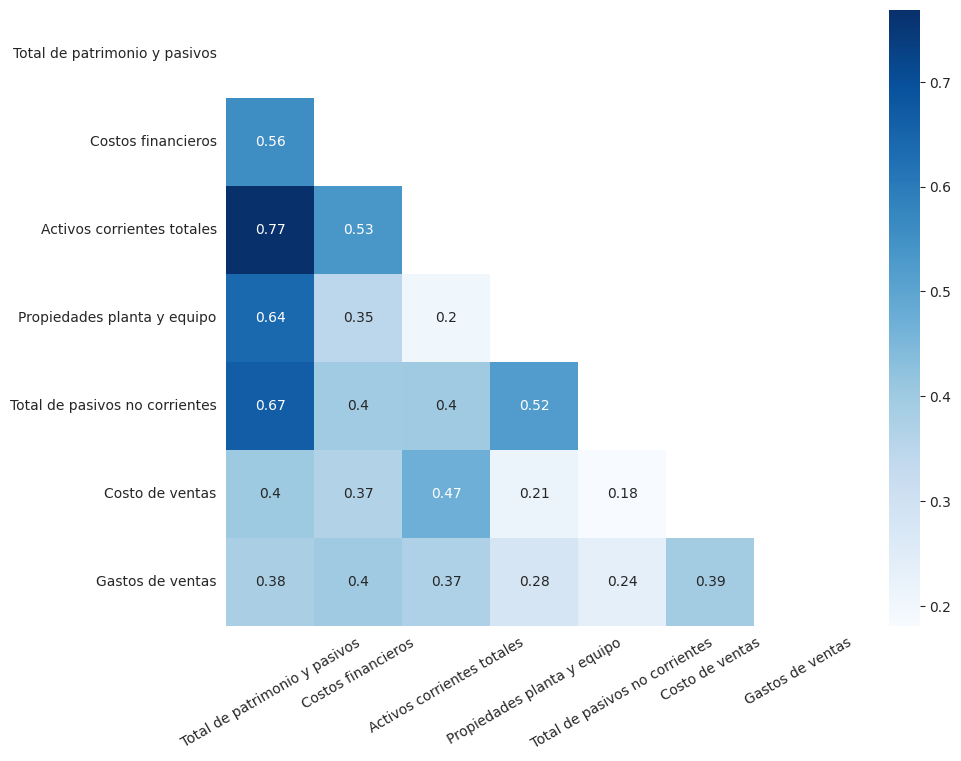

In [128]:
# There is wrong things?
corrMatrix = X.corr(method='pearson')
import numpy as np
mask = np.zeros_like(corrMatrix)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(12, 8))
    ax = sns.heatmap(corrMatrix, mask=mask, square=True, annot=True, cmap="Blues")
    plt.xticks(rotation=30)  # Adjust as needed


In [129]:
X.describe() # Unities

,Total de patrimonio y pasivos,Costos financieros,Activos corrientes totales,Propiedades planta y equipo,Total de pasivos no corrientes,Costo de ventas,Gastos de ventas
count,5.568000e+03,5.568000e+03,5.568000e+03,5.568000e+03,5.568000e+03,5.568000e+03,5.568000e+03
mean,2.093745e+07,6.305112e+05,1.073828e+07,6.461682e+06,4.662020e+06,1.533520e+07,2.221494e+06
std,3.477968e+07,1.586876e+06,2.124850e+07,1.541519e+07,1.059404e+07,4.089001e+07,5.995704e+06
min,9.170000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.200140e+06,3.663025e+04,2.366696e+06,4.501672e+05,3.126518e+05,1.830503e+06,1.658125e+04
50%,1.150400e+07,2.142340e+05,5.520572e+06,2.123758e+06,1.491978e+06,6.382588e+06,5.873825e+05
75%,2.237209e+07,6.263515e+05,1.178093e+07,6.548343e+06,4.512904e+06,1.518768e+07,2.043688e+06
max,7.215649e+08,3.398593e+07,6.908484e+08,3.196547e+08,1.740349e+08,2.027645e+09,1.447637e+08


In [130]:
scaler = StandardScaler()
X_ = scaler.fit_transform(X)
X = pd.DataFrame(X_, columns=X.columns, index=X.index)
X.describe()

,Total de patrimonio y pasivos,Costos financieros,Activos corrientes totales,Propiedades planta y equipo,Total de pasivos no corrientes,Costo de ventas,Gastos de ventas
count,5.568000e+03,5.568000e+03,5.568000e+03,5.568000e+03,5.568000e+03,5.568000e+03,5.568000e+03
mean,3.573132e-17,-2.552237e-18,-2.424625e-17,-2.041789e-17,-1.020895e-17,2.424625e-17,2.360819e-17
std,1.000090e+00,1.000090e+00,1.000090e+00,1.000090e+00,1.000090e+00,1.000090e+00,1.000090e+00
min,-6.020299e-01,-3.973642e-01,-5.054120e-01,-4.192140e-01,-4.401003e-01,-3.750691e-01,-3.705476e-01
25%,-4.237713e-01,-3.742789e-01,-3.940202e-01,-3.900085e-01,-4.105856e-01,-3.302986e-01,-3.677818e-01
50%,-2.712589e-01,-2.623485e-01,-2.455787e-01,-2.814311e-01,-2.992558e-01,-2.189635e-01,-2.725716e-01
75%,4.125315e-02,-2.621540e-03,4.907382e-02,5.622305e-03,-1.407674e-02,-3.607978e-03,-2.965820e-02
max,2.014654e+01,2.102143e+01,3.201032e+01,2.031900e+01,1.598901e+01,4.921718e+01,2.377619e+01


In [131]:
# Analytical!!!
import numpy as np
import statsmodels.api as sm
mod = sm.OLS(y, X)
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:     Ganancia (pérdida)   R-squared (uncentered):                   0.152
Model:                            OLS   Adj. R-squared (uncentered):              0.151
Method:                 Least Squares   F-statistic:                              142.5
Date:                Wed, 25 Sep 2024   Prob (F-statistic):                   6.76e-194
Time:                        17:27:32   Log-Likelihood:                         -91740.
No. Observations:                5568   AIC:                                  1.835e+05
Df Residuals:                    5561   BIC:                                  1.835e+05
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [133]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 32850488814098.758
R-squared: 0.013088393925690944


In [134]:
# Checking the number of PCAs to use.
n_features = X_train.shape[1]
pca = PCA()
pca.fit(X_train)
# Extract principal component metrics
explained_variance = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Create a DataFrame for the results
pca_summary = pd.DataFrame({
    'Standard deviation': np.sqrt(explained_variance),
    'Proportion of Variance': explained_variance_ratio,
    'Cumulative Proportion': cumulative_variance_ratio
})

# Set column names according to the number of components
pca_summary.index = ['PC'+str(i) for i in range(1, n_features+1)]
pca_summary.index.name = None
display(pca_summary) # Check that 2 variables are enough

,Standard deviation,Proportion of Variance,Cumulative Proportion
PC1,1.821197,0.491974,0.491974
PC2,1.039881,0.160397,0.652371
PC3,0.862171,0.110259,0.762630
PC4,0.776110,0.089346,0.851976
PC5,0.734994,0.080130,0.932106
PC6,0.633600,0.059547,0.991653
PC7,0.237214,0.008347,1.000000


In [135]:
1.821197 *1.821197

3.316758512809

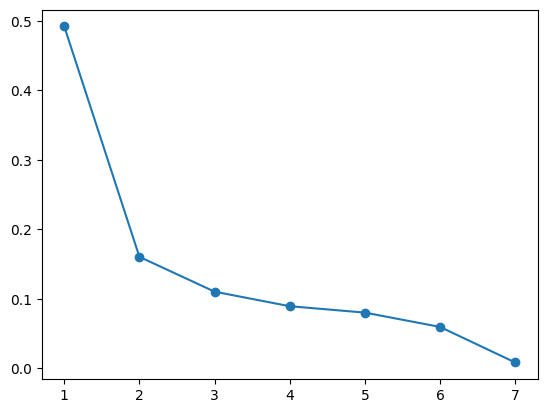

In [136]:
n_features = X_train.shape[1]
pca = PCA()
pca.fit(X_train)
explained_variance = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
plt.plot(range(1, n_features+1),
         pca.explained_variance_ratio_,
         marker='o')

In [137]:
# Notes: The pcas are order explaining the variance..
# Important things to remark....
# Standard deviations are the square root of the eigenvalues..
# Eigenvalue explain the quantity of variability
# For instance the first component have an std dviation of 1.805, then an eigevenvalue of 1.805*1.805
# 1.805*1.805 = 3.13 this means that the first component capture the variability of 3.2 variables.
# Note that the PC3 not explain more than one variable...
# The sum of eigenvalues must be equal to number of variables..
(pca_summary['Standard deviation']**2).sum()
# The column Proportion of variance show the percentage of variance explained by the component

6.7417314535697255

In [138]:
X_train.shape

(4454, 7)

In [139]:
eigenvectors = pca.components_
n_components = X_train.shape[1]
pd.DataFrame(eigenvectors, columns=X_train.columns,
                               index=['PC'+str(i) for i in range(1, n_components+1)])

,Total de patrimonio y pasivos,Costos financieros,Activos corrientes totales,Propiedades planta y equipo,Total de pasivos no corrientes,Costo de ventas,Gastos de ventas
PC1,0.461015,0.372163,0.397021,0.313668,0.363160,0.345417,0.376496
PC2,-0.223826,0.056147,0.145048,-0.419677,-0.504048,0.620750,0.331944
PC3,-0.216637,0.164174,-0.420545,0.245439,-0.116568,-0.326680,0.754128
PC4,0.008879,-0.500873,-0.363136,0.580466,-0.040280,0.524552,-0.058829
PC5,-0.162749,0.761883,-0.352040,0.205785,-0.135526,0.202524,-0.409125
PC6,-0.299697,-0.005377,-0.337837,-0.392950,0.749784,0.268190,0.086643
PC7,0.757662,0.004477,-0.523969,-0.362691,-0.135265,0.023236,0.031681


In [140]:
n_components = 2  # Number of principal components to keep
pca = PCA(n_components=n_components)
X_train = pca.fit_transform(X_train)
# Transform the test data using the same PCA instance
X_test = pca.transform(X_test)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 31621472557166.09
R-squared: 0.05001114460026512
